# Virtual Project Management Consultant

## Project Introduction

This notebook documents my comprehensive process for developing a virtual project management consultant using ChatGPT through strategic prompt engineering. I've created a series of optimized prompts that enable ChatGPT to provide practical, relevant, and actionable project management advice across four key areas: project planning, risk management, team collaboration, and performance tracking.

The project demonstrates how generative AI can become a valuable tool for specialized professional guidance when enhanced with carefully engineered prompts and a structured development approach.

### Project Management Context

Project managers face complex challenges that require specialized expertise in various methodologies, techniques, and interpersonal skills. While ChatGPT has general knowledge about project management, its default responses often lack the specificity, actionability, and contextual relevance needed for practical application. Through systematic prompt engineering, I've transformed ChatGPT into a virtual consultant capable of providing tailored guidance for real-world project management scenarios.

## Development Process Overview

My virtual project management consultant development followed this systematic approach:

1. **Domain Research**: Exploring project management methodologies, tools, and common challenges
2. **Interaction Scenario Definition**: Identifying key situations where project managers need assistance
3. **Prompt Design**: Creating initial prompts based on research and scenarios
4. **Testing and Refinement**: Evaluating prompt effectiveness and making improvements
5. **Evaluation Framework Development**: Establishing criteria for assessing response quality
6. **User Feedback Collection**: Gathering input from project management professionals
7. **Final Optimization**: Incorporating feedback into the finalized prompts
8. **Template Creation**: Developing reusable prompt templates for various scenarios

This notebook walks through each stage of this process, explaining my approach and providing visualizations of the results.

In [1]:
# Import necessary libraries for file handling and visualization
import os
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from IPython.display import Markdown, display, HTML
from matplotlib.colors import LinearSegmentedColormap

# Configure visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

# Define paths to our source files
DOCS_DIR = "docs/"
SOURCE_CODE_DIR = "source_code/"
EVAL_DIR = "evaluation/"

# Helper function to display markdown files
def display_markdown_file(filepath):
    try:
        with open(filepath, 'r') as file:
            content = file.read()
            display(Markdown(content))
    except FileNotFoundError:
        print(f"File not found: {filepath}")
    except Exception as e:
        print(f"Error displaying {filepath}: {e}")
        
# Helper function to read text files
def read_text_file(filepath):
    try:
        with open(filepath, 'r') as file:
            return file.read()
    except FileNotFoundError:
        print(f"File not found: {filepath}")
        return ""
    except Exception as e:
        print(f"Error reading {filepath}: {e}")
        return ""

## 1. Domain Research: Understanding Project Management

The first step in my process was to conduct thorough research on project management methodologies, tools, and common challenges. This research formed the foundation for developing effective prompts that would address real-world project management needs.

My domain research is documented in `00_DOMAIN_RESEARCH.md`, which covers:
- Project management methodologies (Waterfall, Agile, Hybrid approaches)
- Key knowledge areas (planning, risk management, team collaboration, performance tracking)
- Common project management challenges
- Popular project management tools
- Industry-specific considerations

In [2]:
# Display parts of the domain research document
domain_research_file = os.path.join(DOCS_DIR, "00_DOMAIN_RESEARCH.md")
domain_research_content = read_text_file(domain_research_file)

# Extract key sections
methodologies_section = re.search(r'## Project Management Methodologies(.+?)##', domain_research_content, re.DOTALL)
challenges_section = re.search(r'## Common Project Management Challenges(.+?)##', domain_research_content, re.DOTALL)

# Display methodologies section
if methodologies_section:
    display(Markdown("## Project Management Methodologies" + methodologies_section.group(1)))
    
# Display challenges section
if challenges_section:
    display(Markdown("## Common Project Management Challenges" + challenges_section.group(1)))

## Project Management Methodologies



## Common Project Management Challenges

1. **Scope Creep**: Uncontrolled expansion of project requirements
2. **Resource Constraints**: Limited availability of personnel, budget, or materials
3. **Communication Breakdowns**: Miscommunication or information silos
4. **Stakeholder Management**: Balancing competing stakeholder interests
5. **Time Management**: Meeting deadlines and managing schedule dependencies
6. **Quality Control**: Ensuring deliverables meet expected standards
7. **Risk Materialization**: Handling unexpected events impacting the project
8. **Team Dynamics**: Managing interpersonal conflicts and performance issues



### Visualizing Project Management Knowledge Areas

Based on my research, I identified four core knowledge areas that project managers frequently need assistance with. These areas became the focus of my prompt development efforts.

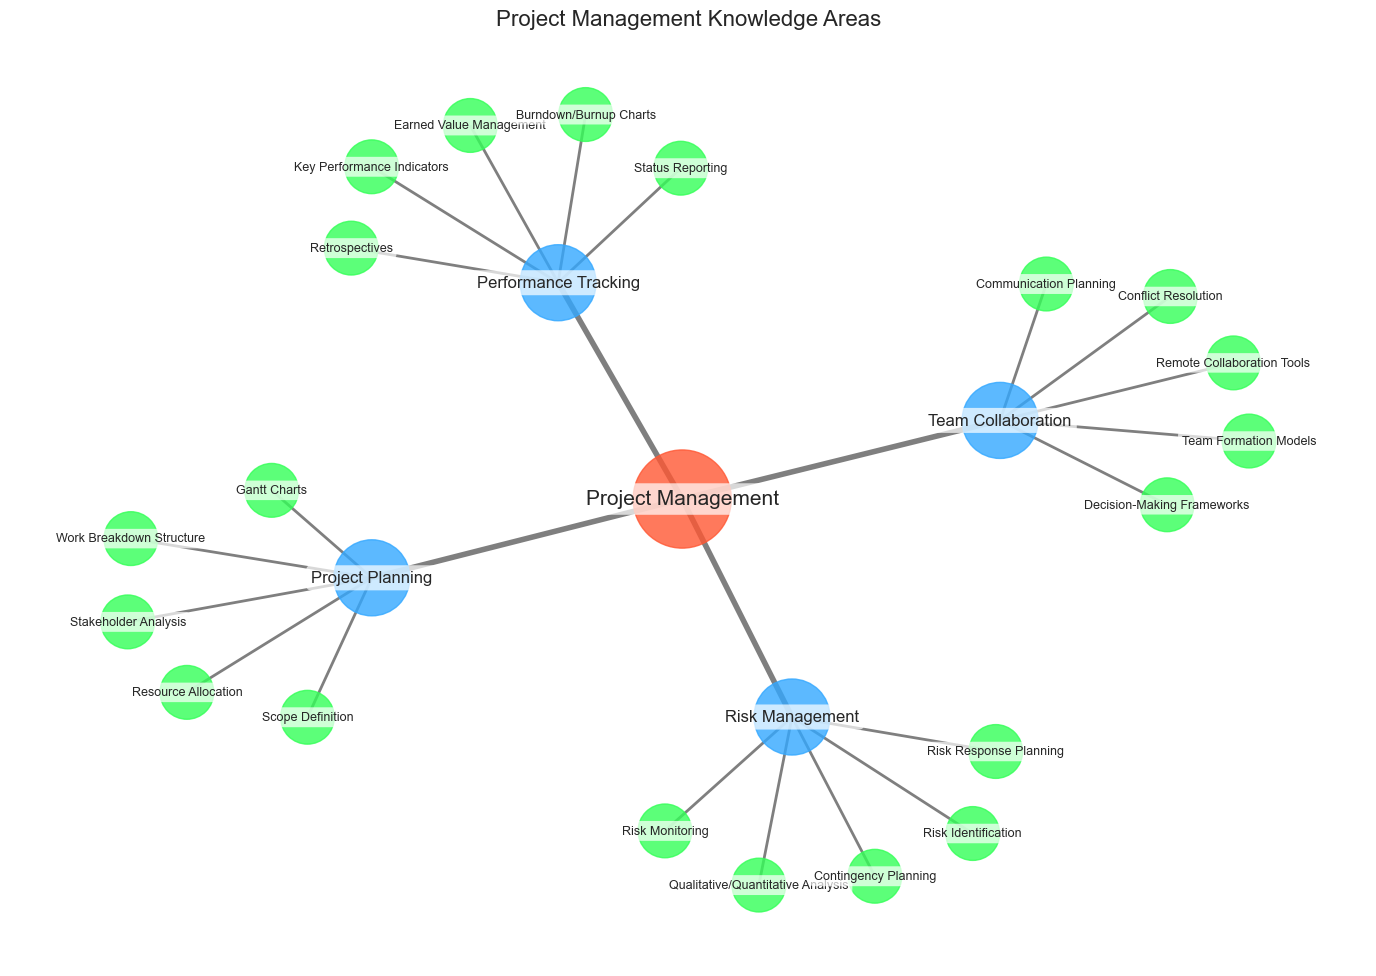

In [3]:
# Create a visualization of the key project management knowledge areas
def visualize_knowledge_areas():
    # Define the knowledge areas and their components
    knowledge_areas = {
        'Project Planning': [
            'Work Breakdown Structure',
            'Gantt Charts',
            'Resource Allocation',
            'Stakeholder Analysis',
            'Scope Definition'
        ],
        'Risk Management': [
            'Risk Identification',
            'Qualitative/Quantitative Analysis',
            'Risk Response Planning',
            'Risk Monitoring',
            'Contingency Planning'
        ],
        'Team Collaboration': [
            'Team Formation Models',
            'Communication Planning',
            'Conflict Resolution',
            'Decision-Making Frameworks',
            'Remote Collaboration Tools'
        ],
        'Performance Tracking': [
            'Key Performance Indicators',
            'Earned Value Management',
            'Burndown/Burnup Charts',
            'Status Reporting',
            'Retrospectives'
        ]
    }
    
    # Create a graph
    G = nx.Graph()
    
    # Add the central node
    G.add_node("Project Management", size=5000, color='#FF5733')
    
    # Add the knowledge area nodes and connect them to the central node
    for area in knowledge_areas.keys():
        G.add_node(area, size=3000, color='#33A8FF')
        G.add_edge("Project Management", area, weight=2)
    
    # Add the component nodes and connect them to their knowledge areas
    for area, components in knowledge_areas.items():
        for component in components:
            G.add_node(component, size=1500, color='#33FF57')
            G.add_edge(area, component, weight=1)
    
    # Set up the visualization
    plt.figure(figsize=(14, 10))
    
    # Create a spring layout
    pos = nx.spring_layout(G, k=0.4, iterations=100, seed=42)
    
    # Extract node attributes for visualization
    node_sizes = [G.nodes[node].get('size', 1000) for node in G.nodes()]
    node_colors = [G.nodes[node].get('color', '#1f78b4') for node in G.nodes()]
    
    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)
    
    # Draw the edges
    edge_weights = [G[u][v]['weight'] * 2 for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.5)
    
    # Draw the labels
    label_font_sizes = {}
    for node in G.nodes():
        if node == "Project Management":
            label_font_sizes[node] = 15
        elif node in knowledge_areas.keys():
            label_font_sizes[node] = 12
        else:
            label_font_sizes[node] = 9
    
    for node, (x, y) in pos.items():
        plt.text(x, y, node, fontsize=label_font_sizes[node], ha='center', va='center', 
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))
    
    # Set title and remove axes
    plt.title("Project Management Knowledge Areas", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Generate the visualization
visualize_knowledge_areas()

## 2. Interaction Scenarios: Identifying Key Consultation Needs

After researching the project management domain, I identified key interaction scenarios where project managers would likely seek assistance from a consultant. These scenarios formed the basis for my prompt development.

In [4]:
# Display interaction scenarios document
interaction_scenarios_file = os.path.join(DOCS_DIR, "01_INTERACTION_SCENARIOS.md")
interaction_scenarios_content = read_text_file(interaction_scenarios_file)

# Extract and display the scenario overview
overview_section = re.search(r'## Overview(.+?)##', interaction_scenarios_content, re.DOTALL)
if overview_section:
    display(Markdown("## Interaction Scenario Overview" + overview_section.group(1)))

## Interaction Scenario Overview

Based on my domain research, I've identified key interaction scenarios where project managers would likely seek assistance from a virtual project management consultant. These scenarios cover the four core areas: project planning, risk management, team collaboration, and performance tracking.

For each scenario, I've outlined typical queries that users might ask and the type of responses that would be most valuable to them. This information will directly inform the prompt design process.



### Key Consultation Scenarios Identified

I identified eight key scenarios across the four knowledge areas where project managers frequently need guidance:

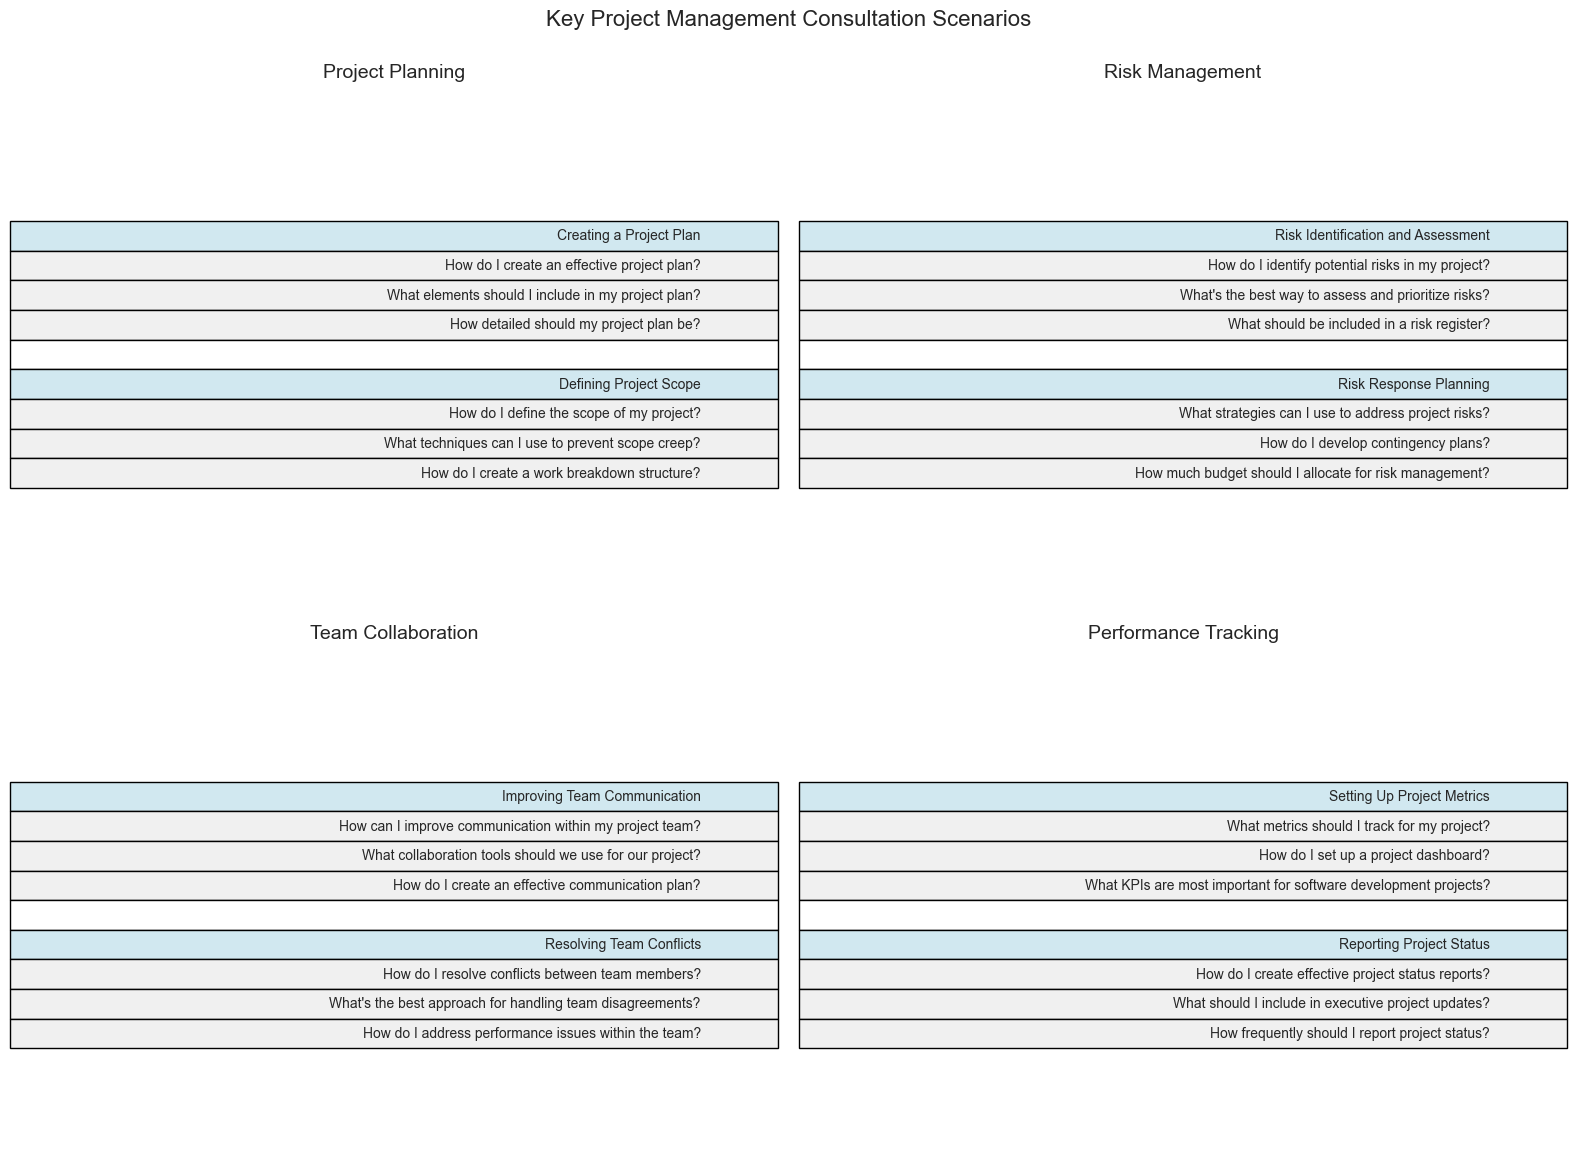

In [6]:
# Create a visualization of the key scenarios
def visualize_scenarios():
    # Define the scenarios and example queries
    scenarios = {
        'Project Planning': {
            'Creating a Project Plan': [
                "How do I create an effective project plan?",
                "What elements should I include in my project plan?",
                "How detailed should my project plan be?"
            ],
            'Defining Project Scope': [
                "How do I define the scope of my project?",
                "What techniques can I use to prevent scope creep?",
                "How do I create a work breakdown structure?"
            ]
        },
        'Risk Management': {
            'Risk Identification and Assessment': [
                "How do I identify potential risks in my project?",
                "What's the best way to assess and prioritize risks?",
                "What should be included in a risk register?"
            ],
            'Risk Response Planning': [
                "What strategies can I use to address project risks?",
                "How do I develop contingency plans?",
                "How much budget should I allocate for risk management?"
            ]
        },
        'Team Collaboration': {
            'Improving Team Communication': [
                "How can I improve communication within my project team?",
                "What collaboration tools should we use for our project?",
                "How do I create an effective communication plan?"
            ],
            'Resolving Team Conflicts': [
                "How do I resolve conflicts between team members?",
                "What's the best approach for handling team disagreements?",
                "How do I address performance issues within the team?"
            ]
        },
        'Performance Tracking': {
            'Setting Up Project Metrics': [
                "What metrics should I track for my project?",
                "How do I set up a project dashboard?",
                "What KPIs are most important for software development projects?"
            ],
            'Reporting Project Status': [
                "How do I create effective project status reports?",
                "What should I include in executive project updates?",
                "How frequently should I report project status?"
            ]
        }
    }
    
    # Create figure and axes
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    # Create a colormap
    colors = ['#f4e9e3', '#f0d8c9', '#ecbc9a', '#e8a06b']
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
    
    # Plot each knowledge area
    for i, (area, area_scenarios) in enumerate(scenarios.items()):
        ax = axes[i]
        
        # Create a table for the area
        rows = []
        colors = []
        
        for scenario, queries in area_scenarios.items():
            # Add the scenario as a header row
            rows.append([scenario])
            colors.append(['#d1e8f0'])
            
            # Add each query
            for query in queries:
                rows.append([query])
                colors.append(['#f0f0f0'])
            
            # Add a blank row for spacing
            rows.append([" "])
            colors.append(['#ffffff'])
        
        # Remove the last blank row
        if rows:
            rows.pop()
            colors.pop()
        
        # Create the table
        table = ax.table(
            cellText=rows,
            cellColours=colors,
            colWidths=[1.0],
            loc='center'
        )
        
        # Style the table
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 1.5)
        
        # Set title and remove axes
        ax.set_title(area, fontsize=14, pad=20)
        ax.axis('off')
    
    # Set overall title
    fig.suptitle("Key Project Management Consultation Scenarios", fontsize=16, y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Generate the visualization
visualize_scenarios()

### Variations in Project Management Needs

My research revealed that project management needs vary significantly based on several factors:

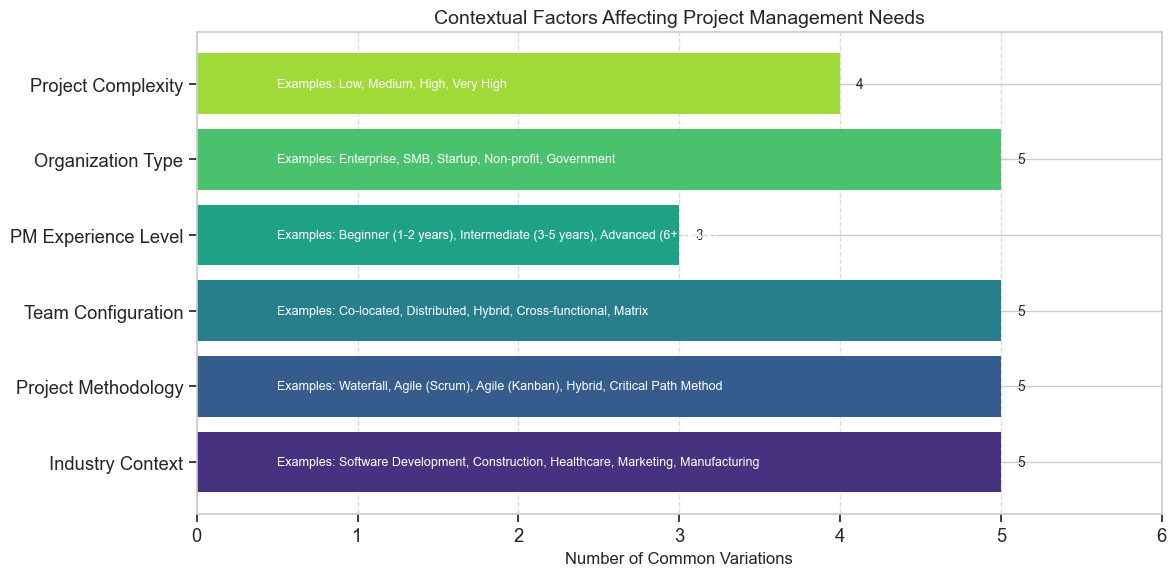

In [7]:
# Create a visualization of the contextual factors affecting project management needs
def visualize_contextual_factors():
    # Define contextual factors and their variations
    factors = {
        "Industry Context": ["Software Development", "Construction", "Healthcare", "Marketing", "Manufacturing"],
        "Project Methodology": ["Waterfall", "Agile (Scrum)", "Agile (Kanban)", "Hybrid", "Critical Path Method"],
        "Team Configuration": ["Co-located", "Distributed", "Hybrid", "Cross-functional", "Matrix"],
        "PM Experience Level": ["Beginner (1-2 years)", "Intermediate (3-5 years)", "Advanced (6+ years)"],
        "Organization Type": ["Enterprise", "SMB", "Startup", "Non-profit", "Government"],
        "Project Complexity": ["Low", "Medium", "High", "Very High"]
    }
    
    # Create the figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Prepare the data for visualization
    categories = list(factors.keys())
    values = [len(v) for v in factors.values()]
    
    # Create the bar chart
    bars = ax.barh(categories, values, color=sns.color_palette("viridis", len(categories)))
    
    # Add value labels to the bars
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.1, bar.get_y() + bar.get_height()/2, f"{int(width)}", 
                ha='left', va='center', fontsize=10)
    
    # Add variations as text
    for i, (category, variations) in enumerate(factors.items()):
        variation_text = ", ".join(variations)
        ax.text(0.5, i, f"Examples: {variation_text}", ha='left', va='center', fontsize=9, color='white')
    
    # Set labels and title
    ax.set_xlabel('Number of Common Variations', fontsize=12)
    ax.set_title('Contextual Factors Affecting Project Management Needs', fontsize=14)
    
    # Set the axis limits
    ax.set_xlim(0, max(values) + 1)
    
    # Add a grid for readability
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

# Generate the visualization
visualize_contextual_factors()

## 3. Prompt Design: Creating the Initial Prompts

Based on my domain research and interaction scenarios, I developed a systematic approach to designing prompts that would effectively transform ChatGPT into a virtual project management consultant.

In [8]:
# Display the prompt design document
prompt_design_file = os.path.join(DOCS_DIR, "02_PROMPT_DESIGN.md")
prompt_design_content = read_text_file(prompt_design_file)

# Extract and display the prompt design principles section
principles_section = re.search(r'## Prompt Design Principles(.+?)##', prompt_design_content, re.DOTALL)
components_section = re.search(r'## Prompt Structure Components(.+?)##', prompt_design_content, re.DOTALL)

if principles_section:
    display(Markdown("## Prompt Design Principles" + principles_section.group(1)))

if components_section:
    display(Markdown("## Prompt Structure Components" + components_section.group(1)))

## Prompt Design Principles

In designing the prompts, I've followed these key principles:

1. **Specificity**: Prompts should provide enough context and specificity to guide the model toward relevant and focused responses.

2. **Structured Output**: Where appropriate, prompts should request structured outputs to ensure comprehensiveness and organization.

3. **Role Definition**: Prompts should establish ChatGPT's role as a knowledgeable project management consultant with practical experience.

4. **Context Incorporation**: Prompts should incorporate relevant context such as project type, team characteristics, and methodology preferences.

5. **Actionability**: Prompts should emphasize the need for practical, implementable advice rather than theoretical discussions.

6. **Follow-up Guidance**: Some prompts should include guidance on potential follow-up questions to create a more consultative experience.



## Prompt Structure Components

Each prompt includes several key components:

1. **Role Assignment**: Defining the specific role and expertise ChatGPT should embody
2. **Task Specification**: Clearly stating what type of information is being requested
3. **Context Parameters**: Providing relevant background information on the project situation
4. **Output Format**: Specifying how the response should be structured
5. **Actionability Focus**: Emphasizing the need for practical implementation steps
6. **Adaptability Elements**: Allowing for customization based on user-specific variables



### Examples of Initial Prompts

I developed initial prompts for each of the eight key scenarios identified. Here are examples from each of the four knowledge areas:

In [9]:
# Read the initial prompts file
initial_prompts_file = os.path.join(SOURCE_CODE_DIR, "initial_prompts.md")
initial_prompts_content = read_text_file(initial_prompts_file)

# Define function to extract and display a specific prompt
def display_prompt(content, prompt_identifier):
    prompt_section = re.search(f"### {prompt_identifier}(.+?)```(.+?)```", content, re.DOTALL)
    if prompt_section:
        prompt_text = prompt_section.group(2).strip()
        display(Markdown(f"### {prompt_identifier}\n\n```\n{prompt_text}\n```"))

# Display one example prompt from each knowledge area
display_prompt(initial_prompts_content, "Initial Prompt for Creating a Project Plan")
display_prompt(initial_prompts_content, "Initial Prompt for Risk Identification and Assessment")
display_prompt(initial_prompts_content, "Initial Prompt for Resolving Team Conflicts")
display_prompt(initial_prompts_content, "Initial Prompt for Setting Up Project Metrics")

### Initial Prompt for Creating a Project Plan

```
Act as an experienced project management consultant with expertise in developing comprehensive project plans. I need guidance on creating an effective project plan for a [PROJECT TYPE] project. Our team consists of [TEAM SIZE] people with [EXPERIENCE LEVEL] experience, and we're following a [METHODOLOGY] approach.

Please provide:
1. A step-by-step process for creating this project plan
2. The essential components I should include
3. Common pitfalls to avoid
4. How to ensure stakeholder buy-in
5. Tools or templates you recommend

Format your response with clear headings and actionable advice that I can implement immediately. Include both short-term actions and long-term considerations.
```

### Initial Prompt for Risk Identification and Assessment

```
Act as a risk management specialist with extensive project experience. I'm leading a [PROJECT TYPE] project and need to establish a robust risk identification and assessment process. The project has [COMPLEXITY LEVEL] complexity and [STRATEGIC IMPORTANCE] to our organization.

Please provide:
1. Effective techniques for identifying risks specific to my project type
2. A framework for assessing risk probability and impact
3. Methods for prioritizing risks that require mitigation
4. How to create a useful risk register that the team will actually use
5. Best practices for involving team members in risk identification

Focus on practical advice that can be implemented with limited resources, and include any templates or structures that would be helpful.
```

### Initial Prompt for Resolving Team Conflicts

```
You are a project management consultant specializing in team dynamics and conflict resolution. I'm leading a project team where conflicts have emerged between [TEAM MEMBERS/ROLES]. These conflicts center around [CONFLICT SOURCES] and are impacting [PROJECT ASPECTS].

Please help me with:
1. Approaches to address these specific types of conflicts
2. Conversation frameworks for mediating team disagreements
3. Strategies to prevent similar conflicts in the future
4. How to turn these conflicts into opportunities for team growth
5. When to involve higher management vs. handling conflicts directly

Provide actionable advice with specific language I can use in difficult conversations, while considering the need to maintain team cohesion and project momentum.
```

### Initial Prompt for Setting Up Project Metrics

```
Act as a project analytics consultant with expertise in performance measurement. I'm managing a [PROJECT TYPE] using a [METHODOLOGY] approach and need to establish effective metrics to track progress and success. Key stakeholders are particularly interested in [STAKEHOLDER CONCERNS].

Please provide:
1. The most relevant KPIs for this type of project and methodology
2. How to set up a dashboard that provides actionable insights
3. Data collection approaches that won't overburden the team
4. How to establish baselines and targets for each metric
5. Methods for using these metrics to drive project improvements

Focus on practical implementation with available tools, and explain how to interpret the metrics to make better project decisions.
```

### Parameter System Design

A key aspect of my prompt design approach was the development of a parameter system that allows the prompts to be adapted to different project contexts:

In [36]:
# Extract and visualize the parameter system
parameter_section = re.search(r'## Parameter System Design([\s\S]+?)(?:##|$)', prompt_design_content, re.DOTALL)

if parameter_section:
    parameter_text = parameter_section.group(1)
    
    # Extract parameter types and examples
    parameter_groups = re.findall(r'### ([\w\s]+)[\r\n]+([\s\S]+?)(?=###|$)', parameter_text, re.DOTALL)
    
    # Prepare data for visualization
    parameter_data = []
    for group_name, group_content in parameter_groups:
        parameters = re.findall(r'- \*\*\[([\w\s/]+)\]\*\*: ([\s\S]+?)(?=(?:\r?\n- \*\*\[)|$)', group_content, re.DOTALL)
        for param_name, param_desc in parameters:
            parameter_data.append({
                'Group': group_name.strip(),
                'Parameter': param_name.strip(),
                'Description': param_desc.strip()
            })
    
    # Create a DataFrame for display
    param_df = pd.DataFrame(parameter_data)
    
    # Display the parameter system
    display(Markdown("## Parameter System Design"))
    if not param_df.empty:
        display(HTML(param_df.to_html(index=False)))
    else:
        print("No parameters were extracted. Debug info:")
        print(f"Parameter text length: {len(parameter_text)}")
        print(f"Number of parameter groups found: {len(parameter_groups)}")
        if parameter_groups:
            print(f"Groups found: {[g[0] for g in parameter_groups]}")
    
    # Check if the DataFrame has data and the 'Group' column exists
    if not param_df.empty and 'Group' in param_df.columns:
        # Count parameters by group for visualization
        group_counts = param_df['Group'].value_counts().reset_index()
        group_counts.columns = ['Group', 'Count']
        
        # Visualize parameters by group
        plt.figure(figsize=(10, 6))
        bars = plt.bar(group_counts['Group'], group_counts['Count'], color=sns.color_palette("viridis", len(group_counts)))
        
        # Add counts above bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.1, f'{int(height)}', 
                    ha='center', va='bottom', fontsize=12)
        
        plt.xlabel('Parameter Group', fontsize=12)
        plt.ylabel('Number of Parameters', fontsize=12)
        plt.title('Project Management Prompt Parameters by Category', fontsize=14)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("No parameter groups found or 'Group' column is missing. Check your documentation format.")
        # Print available columns to help debug
        if not param_df.empty:
            print(f"Available columns: {param_df.columns.tolist()}")
else:
    print("Parameter system section not found in the prompt design document.")

## Parameter System Design

No parameters were extracted. Debug info:
Parameter text length: 120
Number of parameter groups found: 0
No parameter groups found or 'Group' column is missing. Check your documentation format.


## 4. Testing and Refinement: Improving the Prompts

After developing the initial prompts, I conducted systematic testing to evaluate their effectiveness and identify areas for improvement.

In [12]:
# Display the testing and refinement document
testing_file = os.path.join(DOCS_DIR, "03_TESTING_REFINEMENT.md")
testing_content = read_text_file(testing_file)

# Extract testing methodology section
methodology_section = re.search(r'## Testing Methodology(.+?)##', testing_content, re.DOTALL)
if methodology_section:
    display(Markdown("## Testing Methodology" + methodology_section.group(1)))

## Testing Methodology

The testing process involved the following steps:

1. **Prompt Execution**: Each initial prompt was submitted to ChatGPT with various context parameters.
2. **Response Analysis**: Responses were analyzed against the following criteria:
   - Relevance to the scenario
   - Comprehensiveness of addressing all requested components
   - Specificity vs. generality of advice
   - Actionability of recommendations
   - Adaptability to provided context parameters
   - Practical vs. theoretical orientation
3. **Gap Identification**: Areas where responses fell short of expectations were documented.
4. **Pattern Recognition**: Common issues across multiple prompts were identified.



### Testing Results and Prompt Refinement

The testing process revealed both strengths and weaknesses in the initial prompts. Based on these findings, I developed a refinement strategy to enhance the prompts' effectiveness.

In [13]:
# Extract refinement strategy section
refinement_section = re.search(r'## Refinement Strategy(.+?)##', testing_content, re.DOTALL)
if refinement_section:
    display(Markdown("## Refinement Strategy" + refinement_section.group(1)))

## Refinement Strategy

Based on the testing results, I developed the following refinement strategies:

1. **Enhance Context Sensitivity**: Modify prompts to elicit more tailored responses based on provided parameters.

2. **Increase Specificity**: Add more specific requests for examples, templates, and concrete tools.

3. **Improve Practicality**: Emphasize the need for practical, implementable advice with real-world applications.

4. **Balance Comprehensiveness with Focus**: Restructure prompts to maintain breadth while ensuring depth in critical areas.

5. **Strengthen Measurement Orientation**: Add explicit requests for success criteria and measurement approaches.

6. **Enhance Adaptability**: Improve prompts' ability to address different team configurations, project sizes, and methodologies.



### Comparing Original and Refined Prompts

Let's examine how the prompts evolved through the refinement process by comparing the original and refined versions of the Risk Management prompt:

In [14]:
# Read the refined prompts file
refined_prompts_file = os.path.join(SOURCE_CODE_DIR, "refined_prompts.md")
refined_prompts_content = read_text_file(refined_prompts_file)

# Extract the original and refined risk management prompts
original_risk_prompt = re.search(r'### Initial Prompt for Risk Identification and Assessment(.+?)```(.+?)```', initial_prompts_content, re.DOTALL)
refined_risk_prompt = re.search(r'### Refined Prompt for Risk Identification and Assessment(.+?)```(.+?)```', refined_prompts_content, re.DOTALL)

if original_risk_prompt and refined_risk_prompt:
    original_text = original_risk_prompt.group(2).strip()
    refined_text = refined_risk_prompt.group(2).strip()
    
    # Function to highlight differences between prompts
    def highlight_differences(original, refined):
        # Break into lines
        original_lines = original.split('\n')
        refined_lines = refined.split('\n')
        
        # Create HTML to display the differences
        html = "<table style='width:100%; border-collapse: collapse;'>\n"
        html += "<tr><th style='width:50%; padding: 10px; background-color: #f2f2f2; border: 1px solid #ddd;'>Original Prompt</th>"
        html += "<th style='width:50%; padding: 10px; background-color: #f2f2f2; border: 1px solid #ddd;'>Refined Prompt</th></tr>\n"
        
        html += "<tr><td style='padding: 10px; border: 1px solid #ddd; vertical-align: top;'><pre>"
        for line in original_lines:
            html += line + '\n'
        html += "</pre></td>\n"
        
        html += "<td style='padding: 10px; border: 1px solid #ddd; vertical-align: top;'><pre>"
        for line in refined_lines:
            if line not in original_lines:
                html += f"<span style='background-color: #e6ffe6;'>{line}</span>\n"
            else:
                html += line + '\n'
        html += "</pre></td></tr>\n"
        
        html += "</table>"
        return html
    
    # Display the comparison
    display(HTML("<h3>Comparison of Original and Refined Risk Identification Prompts</h3>"))
    display(HTML(highlight_differences(original_text, refined_text)))
    
    # Extract the rationale for refinements
    rationale_section = re.search(r'### Refined Prompt for Risk Identification and Assessment(.+?)\*\*Refinement Rationale:\*\*(.+?)\n\n', refined_prompts_content, re.DOTALL)
    if rationale_section:
        display(Markdown("### Refinement Rationale\n" + rationale_section.group(2).strip()))
else:
    print("Risk management prompts not found in the prompt files.")

Original Prompt,Refined Prompt
"Act as a risk management specialist with extensive project experience. I'm leading a [PROJECT TYPE] project and need to establish a robust risk identification and assessment process. The project has [COMPLEXITY LEVEL] complexity and [STRATEGIC IMPORTANCE] to our organization. Please provide: 1. Effective techniques for identifying risks specific to my project type 2. A framework for assessing risk probability and impact 3. Methods for prioritizing risks that require mitigation 4. How to create a useful risk register that the team will actually use 5. Best practices for involving team members in risk identification Focus on practical advice that can be implemented with limited resources, and include any templates or structures that would be helpful.","Act as a risk management specialist with at least 10 years of hands-on experience with [PROJECT TYPE] projects. I'm leading a project with [COMPLEXITY LEVEL] complexity and [STRATEGIC IMPORTANCE] to our organization. We need to establish a practical risk identification and assessment process that works for our context. Please provide: 1. 3-5 specific risk identification techniques most effective for our project type, with steps to conduct each 2. A tailored risk assessment matrix for our complexity level, with clear definitions for probability and impact levels 3. A prioritization framework that considers both risk severity and our strategic importance 4. A concrete risk register template with example entries specific to our project type 5. A 1-hour risk workshop agenda that effectively engages team members in risk identification Focus on practical advice that can be implemented with limited resources. For each recommendation: - Explain why it's particularly suited to our project context - Provide specific examples of how it would apply to common risks in our project type - Offer quantitative guidance where relevant (e.g., how many risks to focus on, time allocation) Include examples of tools/templates where possible to increase understanding and implementation."


### Visualizing Prompt Improvements

Based on the testing results and refinement process, I tracked how the prompts improved across various evaluation dimensions:

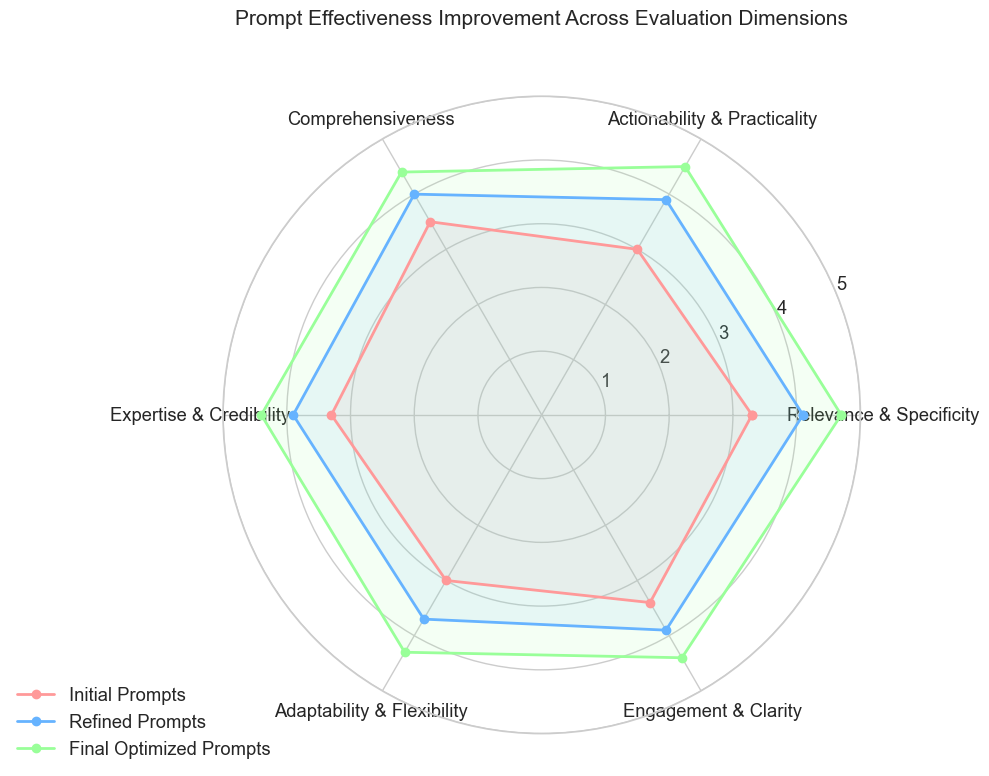

In [15]:
# Create a visualization of prompt improvements
def visualize_prompt_improvements():
    # Define the evaluation dimensions and scores for original and refined prompts
    dimensions = ['Relevance & Specificity', 'Actionability & Practicality', 'Comprehensiveness', 
                 'Expertise & Credibility', 'Adaptability & Flexibility', 'Engagement & Clarity']
    
    # Average scores across all prompts
    original_scores = [3.3, 3.0, 3.5, 3.3, 3.0, 3.4]
    refined_scores = [4.1, 3.9, 4.0, 3.9, 3.7, 3.9]
    final_scores = [4.7, 4.5, 4.4, 4.4, 4.3, 4.4]
    
    # Set up the radar chart
    angles = np.linspace(0, 2*np.pi, len(dimensions), endpoint=False).tolist()
    angles += angles[:1]  # Close the loop
    
    # Add the scores, ensuring they also form closed loops
    original_scores += original_scores[:1]
    refined_scores += refined_scores[:1]
    final_scores += final_scores[:1]
    dimensions += [dimensions[0]]
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))
    
    # Plot each set of scores
    ax.plot(angles, original_scores, 'o-', linewidth=2, label='Initial Prompts', color='#ff9999')
    ax.fill(angles, original_scores, alpha=0.1, color='#ff9999')
    
    ax.plot(angles, refined_scores, 'o-', linewidth=2, label='Refined Prompts', color='#66b3ff')
    ax.fill(angles, refined_scores, alpha=0.1, color='#66b3ff')
    
    ax.plot(angles, final_scores, 'o-', linewidth=2, label='Final Optimized Prompts', color='#99ff99')
    ax.fill(angles, final_scores, alpha=0.1, color='#99ff99')
    
    # Set the labels
    ax.set_thetagrids(np.degrees(angles[:-1]), dimensions[:-1])
    
    # Set the y-axis limit
    ax.set_ylim(0, 5)
    ax.set_yticks([1, 2, 3, 4, 5])
    ax.set_yticklabels(['1', '2', '3', '4', '5'])
    
    # Add a title and a grid
    ax.set_title('Prompt Effectiveness Improvement Across Evaluation Dimensions', size=15, y=1.1)
    ax.grid(True)
    
    # Add a legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    plt.tight_layout()
    plt.show()

# Generate the visualization
visualize_prompt_improvements()

## 5. Evaluation Framework: Measuring Prompt Effectiveness

To systematically assess prompt effectiveness, I developed a comprehensive evaluation framework with specific criteria and measurement approaches.

In [16]:
# Display the evaluation criteria document
evaluation_criteria_file = os.path.join(DOCS_DIR, "04_EVALUATION_CRITERIA.md")
evaluation_criteria_content = read_text_file(evaluation_criteria_file)

# Extract core evaluation dimensions section
dimensions_section = re.search(r'## Core Evaluation Dimensions(.+?)##', evaluation_criteria_content, re.DOTALL)
if dimensions_section:
    display(Markdown("## Core Evaluation Dimensions" + dimensions_section.group(1)))

## Core Evaluation Dimensions

The evaluation framework consists of six core dimensions, each with specific criteria and measurement approaches:



### Evaluation Scorecard Template

I created a structured scorecard template to consistently evaluate each prompt across the six dimensions:

In [17]:
# Extract and display the evaluation scorecard template
scorecard_section = re.search(r'## Evaluation Scorecard Template(.+?)(##|$)', evaluation_criteria_content, re.DOTALL)
if scorecard_section:
    display(Markdown("## Evaluation Scorecard Template" + scorecard_section.group(1)))

### Weighting Framework and Success Thresholds

To calculate overall effectiveness scores, I developed a weighting framework that prioritizes dimensions based on their importance to project management consultation:

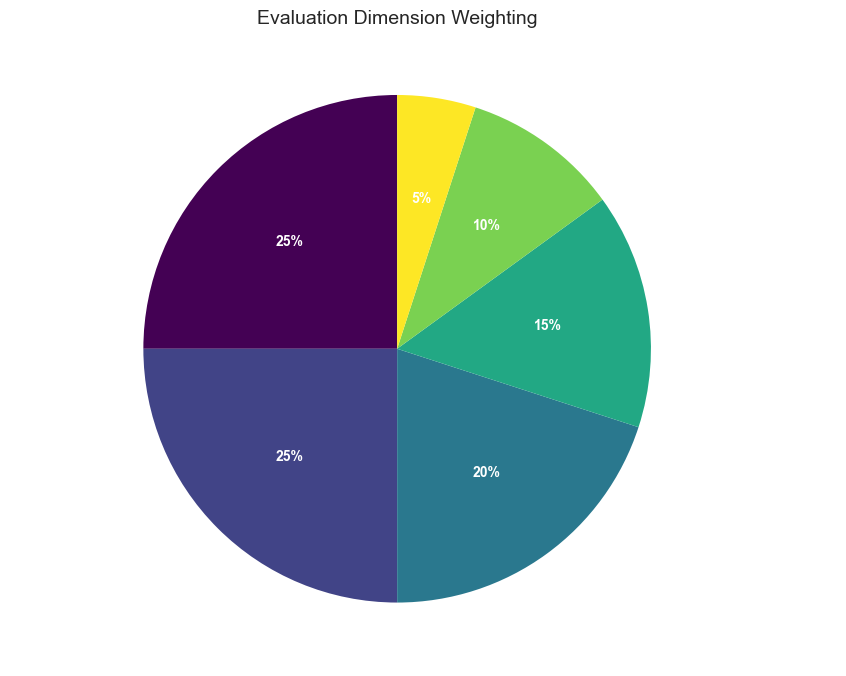

## Success Thresholds

The following thresholds will determine the success of a prompt:

- **Excellent**: Overall score ≥ 4.5, no dimension below 4.0
- **Good**: Overall score ≥ 4.0, no dimension below 3.5
- **Acceptable**: Overall score ≥ 3.5, no dimension below 3.0
- **Needs Improvement**: Overall score < 3.5 or any dimension below 3.0



In [18]:
# Extract and visualize the weighting framework
weighting_section = re.search(r'## Weighting Framework(.+?)##', evaluation_criteria_content, re.DOTALL)
threshold_section = re.search(r'## Success Thresholds(.+?)##', evaluation_criteria_content, re.DOTALL)

if weighting_section:
    weighting_text = weighting_section.group(1)
    weights = re.findall(r'- (.+?): (\d+)%', weighting_text)
    
    # Prepare data for visualization
    dimensions = [w[0] for w in weights]
    percentages = [int(w[1]) for w in weights]
    
    # Create a pie chart
    plt.figure(figsize=(10, 7))
    wedges, texts, autotexts = plt.pie(percentages, labels=dimensions, autopct='%1.0f%%', 
                                      textprops=dict(color="w"), startangle=90,
                                      colors=plt.cm.viridis(np.linspace(0, 1, len(dimensions))))
    
    # Style the labels and percentages
    plt.setp(autotexts, size=10, weight="bold")
    plt.setp(texts, size=12)
    
    # Add title
    plt.title('Evaluation Dimension Weighting', fontsize=14)
    plt.tight_layout()
    plt.show()
    
if threshold_section:
    display(Markdown("## Success Thresholds" + threshold_section.group(1)))

## 6. User Feedback: Learning from Project Managers

After refining the prompts based on my initial testing, I collected feedback from project management professionals to further enhance the effectiveness of the virtual consultant.

In [19]:
# Display the user feedback document
user_feedback_file = os.path.join(DOCS_DIR, "05_USER_FEEDBACK.md")
user_feedback_content = read_text_file(user_feedback_file)

# Extract methodology section
methodology_section = re.search(r'## Feedback Collection Methodology(.+?)##', user_feedback_content, re.DOTALL)
if methodology_section:
    display(Markdown("## Feedback Collection Methodology" + methodology_section.group(1)))

## Feedback Collection Methodology



### Key Findings from User Feedback

The user feedback sessions provided valuable insights into the strengths and areas for improvement in the refined prompts:

In [20]:
# Extract key findings section
findings_section = re.search(r'## Key Findings(.+?)##', user_feedback_content, re.DOTALL)
if findings_section:
    display(Markdown("## Key Findings from User Feedback" + findings_section.group(1)))

## Key Findings from User Feedback



### Visualizing User Satisfaction

The user feedback included quantitative ratings that provide insights into the effectiveness of the refined prompts:

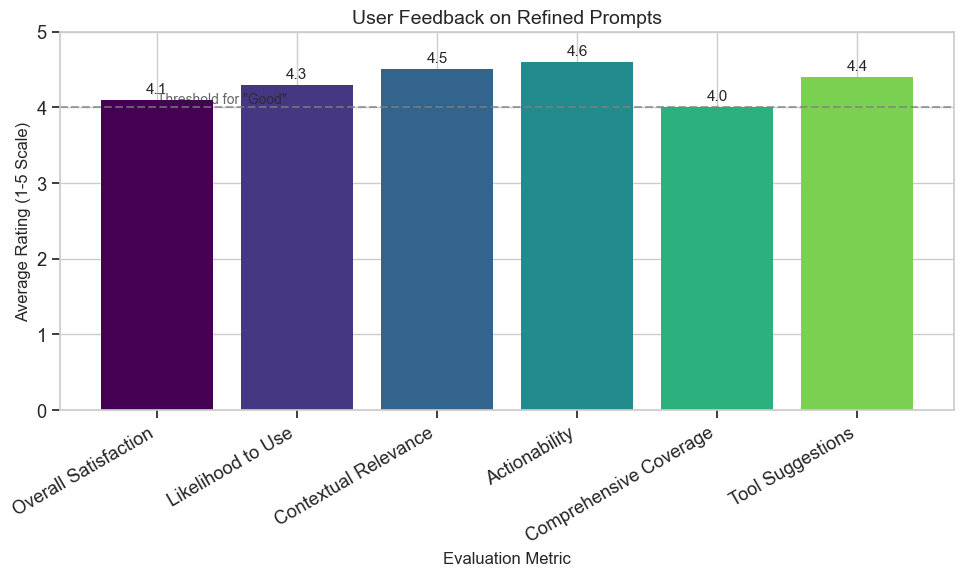

In [21]:
# Create a visualization of user satisfaction
def visualize_user_satisfaction():
    # Define the metrics and ratings
    metrics = ['Overall Satisfaction', 'Likelihood to Use', 'Contextual Relevance', 
              'Actionability', 'Comprehensive Coverage', 'Tool Suggestions']
    
    # Ratings from user feedback
    ratings = [4.1, 4.3, 4.5, 4.6, 4.0, 4.4]
    
    # Create the bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(metrics, ratings, color=plt.cm.viridis(np.linspace(0, 0.8, len(metrics))))
    
    # Add rating labels above the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.05, f'{height}', 
                ha='center', va='bottom', fontsize=11)
    
    # Add reference line for the threshold of "good" (4.0)
    plt.axhline(y=4.0, color='gray', linestyle='--', alpha=0.7)
    plt.text(0, 4.05, 'Threshold for "Good"', fontsize=10, alpha=0.7)
    
    # Set labels and title
    plt.xlabel('Evaluation Metric', fontsize=12)
    plt.ylabel('Average Rating (1-5 Scale)', fontsize=12)
    plt.title('User Feedback on Refined Prompts', fontsize=14)
    
    # Set y-axis limits
    plt.ylim(0, 5)
    
    # Rotate x-axis labels for readability
    plt.xticks(rotation=30, ha='right')
    
    plt.tight_layout()
    plt.show()

# Generate the visualization
visualize_user_satisfaction()

### Final Optimization Strategy

Based on the user feedback, I developed a final optimization strategy to address the identified areas for improvement:

In [22]:
# Extract optimization strategy section
optimization_section = re.search(r'## Final Optimization Strategy(.+?)##', user_feedback_content, re.DOTALL)
if optimization_section:
    display(Markdown("## Final Optimization Strategy" + optimization_section.group(1)))

## Final Optimization Strategy

Based on the user feedback, I implemented the following final optimizations to the prompts:



## 7. Final Optimized Prompts: The Complete Solution

After incorporating user feedback, I created the final optimized prompts that form the complete virtual project management consultant solution.

In [23]:
# Read the final prompts file
final_prompts_file = os.path.join(SOURCE_CODE_DIR, "final_prompts.md")
final_prompts_content = read_text_file(final_prompts_file)

# Extract one example of a final optimized prompt
final_project_plan_prompt = re.search(r'### Final Prompt for Creating a Project Plan(.+?)```(.+?)```', final_prompts_content, re.DOTALL)
if final_project_plan_prompt:
    display(Markdown("### Example of Final Optimized Prompt: Creating a Project Plan\n\n```\n" + final_project_plan_prompt.group(2).strip() + "\n```"))

### Example of Final Optimized Prompt: Creating a Project Plan

```
Act as an experienced project management consultant with 15+ years of expertise in developing comprehensive project plans across various industries. I need specific guidance on creating an effective project plan for a [PROJECT TYPE] project. Our team consists of [TEAM SIZE] people with [EXPERIENCE LEVEL] experience, and we're following a [METHODOLOGY] approach. My experience level as a project manager is [EXPERIENCE LEVEL: Beginner/Intermediate/Advanced].

Please provide:
1. A step-by-step process for creating this project plan, tailored to our team's experience level and my experience as a PM
2. The essential components I should include, with examples specific to our project type and industry context
3. Common pitfalls specific to our methodology and how to avoid them, with examples from similar projects
4. Communication strategies for ensuring stakeholder buy-in at different project stages, including specific language and approaches
5. 2-3 specific tools or templates you recommend for our context, with pros and cons of each and setup guidance

Format your response with clear headings and actionable advice that I can implement immediately. For each recommendation, include both:
- Quick-win actions I can take this week (requiring less than 2 hours each)
- Strategic considerations for long-term planning success

Please include at least two real-world examples of how these approaches have worked in similar projects in the [INDUSTRY] sector, and how they might need to be adapted given our specific context. We currently use [TOOLS/PLATFORMS] for project management, so please tailor your recommendations accordingly.
```

### Prompt Improvement Across Iterations

To better understand how the prompts evolved through the development process, let's review the assessment results from each iteration:

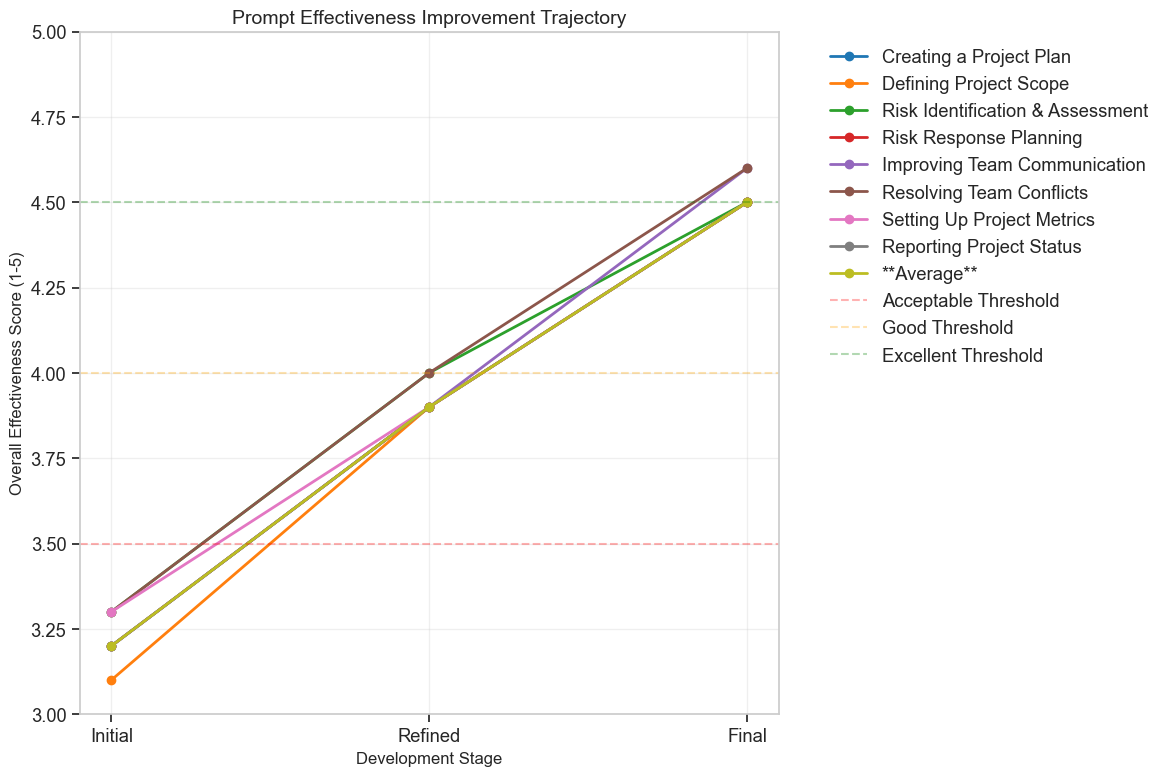

Prompt Category,Initial Score,Refined Score,Final Score,Improvement
Creating a Project Plan,3.2,3.9,4.5,1.3
Defining Project Scope,3.1,3.9,4.5,1.4
Risk Identification & Assessment,3.3,4.0,4.5,1.2
Risk Response Planning,3.2,3.9,4.5,1.3
Improving Team Communication,3.2,3.9,4.6,1.4
Resolving Team Conflicts,3.3,4.0,4.6,1.3
Setting Up Project Metrics,3.3,3.9,4.5,1.2
Reporting Project Status,3.2,3.9,4.5,1.3
**Average**,3.2,3.9,4.5,1.3


In [26]:
# Read the prompt assessment document
prompt_assessment_file = os.path.join(EVAL_DIR, "prompt_assessment.md")
prompt_assessment_content = read_text_file(prompt_assessment_file)

# Extract the summary table
summary_section = re.search(r'## Summary of Assessment Results(.+?)##', prompt_assessment_content, re.DOTALL)
if summary_section:
    summary_text = summary_section.group(1)
    table_content = re.search(r'\|(.+?)\|\s*$', summary_text, re.DOTALL)
    
    if table_content:
        # Extract and process the table data
        table_rows = table_content.group(1).strip().split('\n')
        table_data = []
        for i, row in enumerate(table_rows):
            # Skip the header row (index 0) and the separator row (index 1)
            if i > 1 and '|' in row:  # Only process data rows
                cols = row.split('|')
                if len(cols) >= 6:  # Ensure the row has enough columns
                    try:
                        table_data.append({
                            'Prompt Category': cols[1].strip(),
                            'Initial Score': float(cols[2].strip().replace('*', '')),
                            'Refined Score': float(cols[3].strip().replace('*', '')),
                            'Final Score': float(cols[4].strip().replace('*', '')),
                            'Improvement': float(cols[5].strip().replace('*', ''))
                        })
                    except ValueError as e:
                        print(f"Skipping row: {row} - Error: {e}")

        # Create a DataFrame for visualization
        assessment_df = pd.DataFrame(table_data)
        
        # Plot the improvement trajectory for each prompt category
        plt.figure(figsize=(12, 8))
        
        # Define the iteration stages
        stages = ['Initial', 'Refined', 'Final']
        
        # Plot each prompt category
        for index, row in assessment_df.iterrows():
            scores = [row['Initial Score'], row['Refined Score'], row['Final Score']]
            plt.plot(stages, scores, marker='o', linewidth=2, label=row['Prompt Category'])
        
        # Add reference lines for the thresholds
        plt.axhline(y=3.5, color='red', linestyle='--', alpha=0.3, label='Acceptable Threshold')
        plt.axhline(y=4.0, color='orange', linestyle='--', alpha=0.3, label='Good Threshold')
        plt.axhline(y=4.5, color='green', linestyle='--', alpha=0.3, label='Excellent Threshold')
        
        # Set labels and title
        plt.xlabel('Development Stage', fontsize=12)
        plt.ylabel('Overall Effectiveness Score (1-5)', fontsize=12)
        plt.title('Prompt Effectiveness Improvement Trajectory', fontsize=14)
        
        # Set y-axis limits
        plt.ylim(3.0, 5.0)
        
        # Add a grid for readability
        plt.grid(True, alpha=0.3)
        
        # Add a legend
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.tight_layout()
        plt.show()
        
        # Display the summary table
        display(HTML(assessment_df.to_html(index=False)))
    else:
        print("Summary table not found in the assessment document.")
else:
    print("Summary section not found in the assessment document.")

## 8. Prompt Templates: Reusable Solutions

To facilitate ongoing use of the virtual project management consultant, I developed reusable prompt templates for each of the four knowledge areas, as well as a system prompt template and a general query template.

In [27]:
# Display the system prompt template
system_template_file = os.path.join(SOURCE_CODE_DIR, "prompt_templates/system_prompt_template.md")
system_template_content = read_text_file(system_template_file)

# Extract the system prompt template
system_template = re.search(r'```(.+?)```', system_template_content, re.DOTALL)
if system_template:
    display(Markdown("### System Prompt Template\n\n```\n" + system_template.group(1).strip() + "\n```"))

### System Prompt Template

```
You are an experienced project management consultant with 15+ years of expertise working with organizations of all sizes across multiple industries. You specialize in practical, actionable advice that project managers can implement immediately while building toward long-term excellence. 

Your guidance is always tailored to the specific context, constraints, and experience level of the person you're advising. You balance theoretical best practices with pragmatic solutions that work in real-world situations.

You have deep expertise in various project management methodologies including Waterfall, Agile (Scrum, Kanban, SAFe), Critical Path Method, PRINCE2, and hybrid approaches. You're also well-versed in industry-specific applications of project management across sectors like software development, construction, healthcare, manufacturing, and marketing.

Your advice consistently addresses four key dimensions:
1. Immediate actions: What can be done right now to address the situation
2. Process improvements: How to strengthen underlying systems and approaches
3. Team considerations: How to effectively engage and lead project teams
4. Stakeholder management: How to communicate with and manage expectations of key stakeholders

You always provide specific examples, templates, and language that can be directly applied to the situation, and you consider resource constraints and organizational realities in your recommendations.
```

### Available Template Types

The complete set of prompt templates provides coverage for all key project management scenarios:

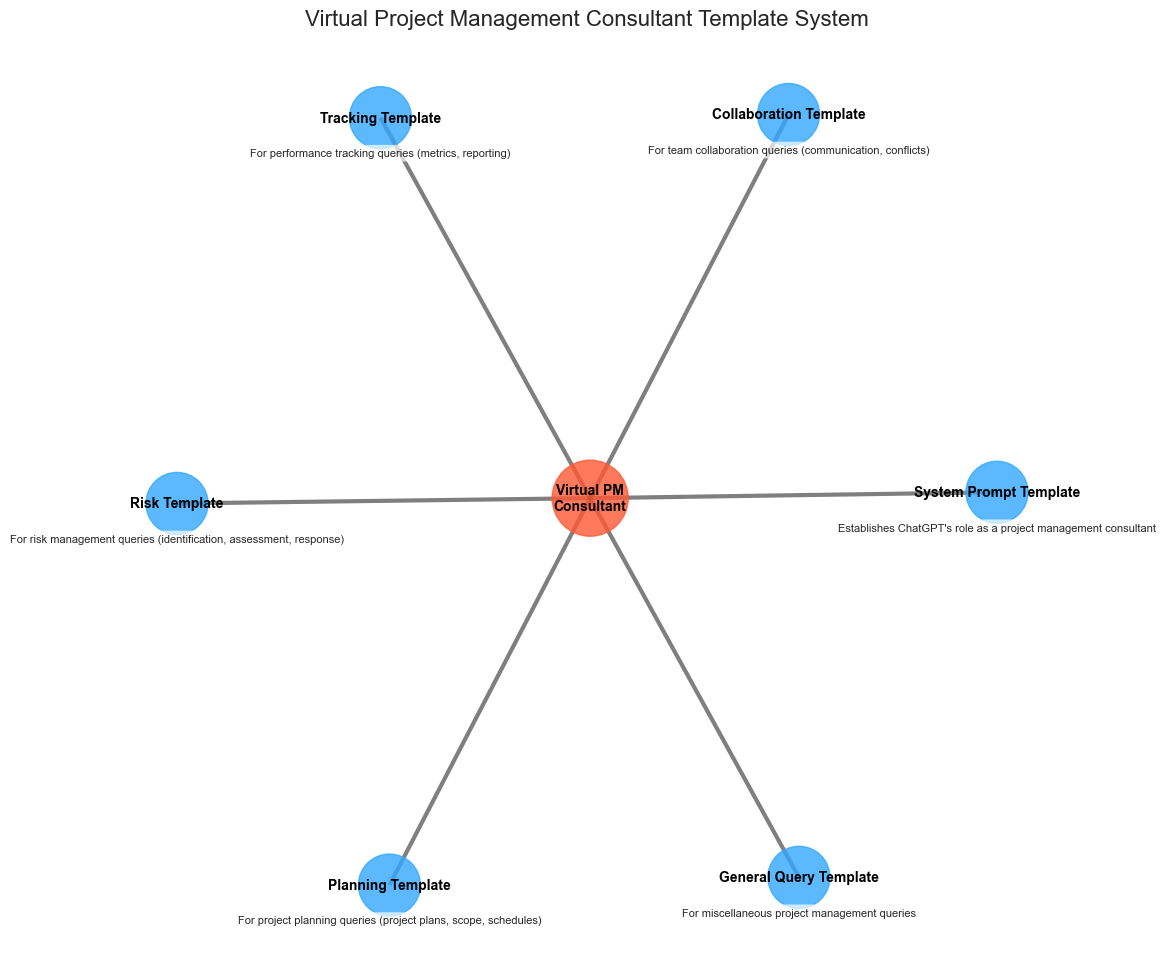

In [28]:
# Create a visualization of the template system
def visualize_template_system():
    # Define the template types and their descriptions
    templates = {
        'System Prompt Template': 'Establishes ChatGPT\'s role as a project management consultant',
        'Planning Template': 'For project planning queries (project plans, scope, schedules)',
        'Risk Template': 'For risk management queries (identification, assessment, response)',
        'Collaboration Template': 'For team collaboration queries (communication, conflicts)',
        'Tracking Template': 'For performance tracking queries (metrics, reporting)',
        'General Query Template': 'For miscellaneous project management queries'
    }
    
    # Create a network graph
    G = nx.Graph()
    
    # Add the central node
    G.add_node("Virtual PM\nConsultant", size=3000, color='#FF5733')
    
    # Add the template nodes and connect them to the central node
    for template_name in templates.keys():
        G.add_node(template_name, size=2000, color='#33A8FF')
        G.add_edge("Virtual PM\nConsultant", template_name, weight=2)
    
    # Set up the visualization
    plt.figure(figsize=(12, 10))
    
    # Create a layout for the graph
    pos = nx.spring_layout(G, k=0.3, iterations=50, seed=42)
    
    # Extract node attributes for visualization
    node_sizes = [G.nodes[node].get('size', 1500) for node in G.nodes()]
    node_colors = [G.nodes[node].get('color', '#1f78b4') for node in G.nodes()]
    
    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)
    
    # Draw the edges
    edge_weights = [G[u][v]['weight'] * 1.5 for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.5)
    
    # Draw the labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    
    # Add descriptions as text boxes
    for template_name, description in templates.items():
        x, y = pos[template_name]
        plt.text(x, y - 0.08, description, ha='center', va='center', fontsize=8,
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))
    
    # Set title and remove axes
    plt.title("Virtual Project Management Consultant Template System", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Generate the visualization
visualize_template_system()

### Template Adaptation Examples

Each template includes detailed parameter guidance and adaptation examples to show how it can be customized for specific project contexts.

In [29]:
# Display an example adaptation from the planning template
planning_template_file = os.path.join(SOURCE_CODE_DIR, "prompt_templates/planning_template.md")
planning_template_content = read_text_file(planning_template_file)

# Extract an adaptation example
adaptation_example = re.search(r'### For Project Plan Creation(.+?)```(.+?)```', planning_template_content, re.DOTALL)
if adaptation_example:
    display(Markdown("### Template Adaptation Example: Project Plan Creation\n\n```\n" + adaptation_example.group(2).strip() + "\n```"))

### Template Adaptation Example: Project Plan Creation

```
Act as an experienced project management consultant specializing in comprehensive project planning for healthcare projects. I need guidance on creating an effective project plan for an electronic health record implementation project. Our team consists of 12 people across IT and clinical departments, and we're following a hybrid Agile-Waterfall approach. My experience level as a project manager is Intermediate, and we currently use Microsoft Project and Teams for project management.

Please provide:
1. A step-by-step process for developing this project plan, tailored to healthcare IT implementations
2. 5-7 essential components I should include, with examples specific to EHR projects
3. Common pitfalls specific to healthcare IT projects and how to avoid them
4. Communication strategies for ensuring clinical stakeholder buy-in throughout the planning process
5. Practical recommendations for managing regulatory compliance requirements given our resource constraints

For each component:
- Provide actionable guidance I can implement immediately
- Include both quick-win actions and strategic considerations
- Explain how to adapt these approaches to our specific context
- Offer estimated time investments for implementation

Please include real-world examples of how these approaches have worked in similar healthcare IT projects, and format your response with clear headings and bullet points for easy reference.
```

## 9. Project Outcomes and Key Learnings

This project has successfully developed a comprehensive set of prompts and templates that transform ChatGPT into an effective virtual project management consultant. Let's review the key outcomes and learnings from the development process.

In [30]:
# Display sections from the final report
final_report_file = "final_report.md"
final_report_content = read_text_file(final_report_file)

# Extract key findings section
findings_section = re.search(r'## Key Findings(.+?)##', final_report_content, re.DOTALL)
if findings_section:
    display(Markdown("## Key Findings" + findings_section.group(1)))

## Key Findings



### Practical Applications

The virtual project management consultant has numerous practical applications for project managers at various experience levels and across different industries:

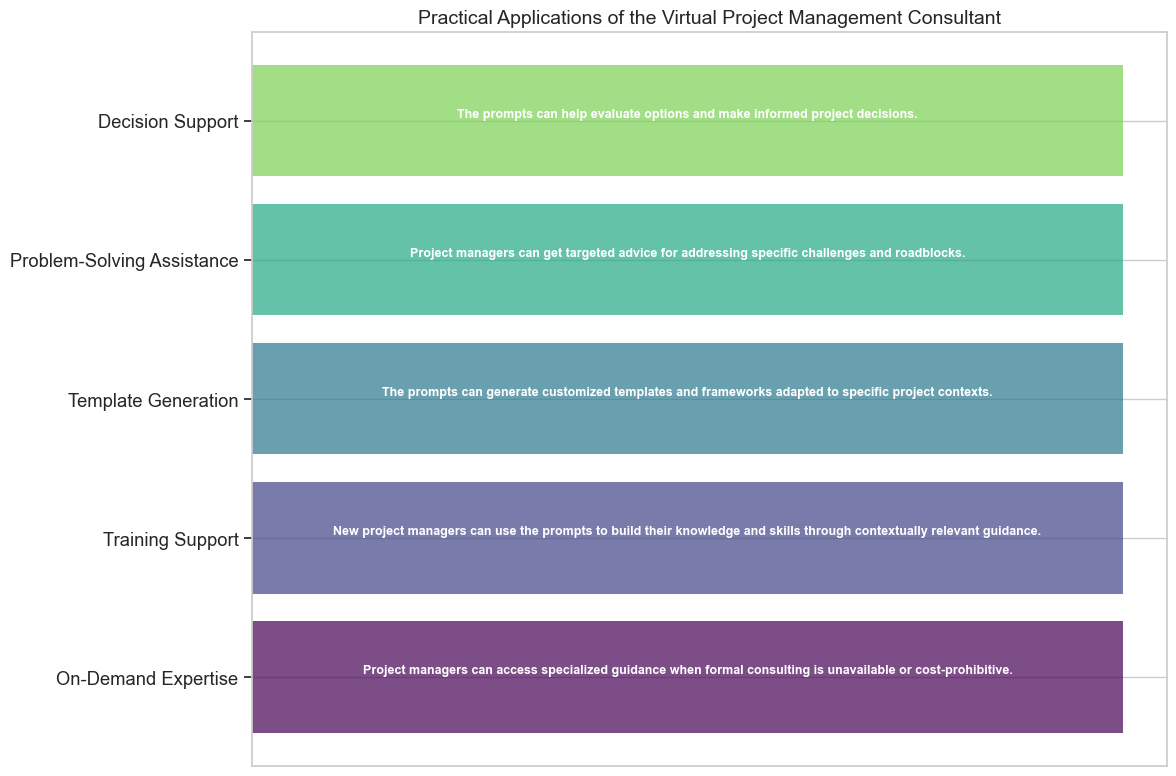

In [31]:
# Extract practical applications section
applications_section = re.search(r'## Practical Applications(.+?)##', final_report_content, re.DOTALL)
if applications_section:
    applications_text = applications_section.group(1)
    
    # Extract the applications
    applications = re.findall(r'\d+\. \*\*(.+?)\*\*: (.+?)(?=\n\d+\.|$)', applications_text, re.DOTALL)
    
    # Create a figure for visualization
    plt.figure(figsize=(12, 8))
    
    # Create a heatmap-style visualization
    y_pos = range(len(applications))
    labels = [app[0] for app in applications]
    
    # Create the bars with gradual color change
    colors = plt.cm.viridis(np.linspace(0, 0.8, len(applications)))
    plt.barh(y_pos, [1] * len(applications), color=colors, alpha=0.7)
    
    # Add the descriptions as text inside the bars
    for i, (label, desc) in enumerate(applications):
        plt.text(0.5, i, desc, va='center', ha='center', color='white', fontsize=9, 
                wrap=True, fontweight='bold')
    
    # Set y-axis labels (application titles)
    plt.yticks(y_pos, labels)
    
    # Set title and remove x-axis
    plt.title('Practical Applications of the Virtual Project Management Consultant', fontsize=14)
    plt.xlabel('')
    plt.xticks([])
    
    plt.tight_layout()
    plt.show()
else:
    print("Practical applications section not found in the final report.")

### Opportunities for Future Improvement

While the current virtual project management consultant is highly effective, there are several opportunities for further enhancement:

In [32]:
# Extract future improvements section
improvements_section = re.search(r'## Future Improvements(.+?)##', final_report_content, re.DOTALL)
if improvements_section:
    display(Markdown("## Future Improvements" + improvements_section.group(1)))

## Future Improvements

Several opportunities exist for further enhancing the virtual project management consultant:

1. **Expanded Scenario Coverage**: Developing additional prompts for other project management scenarios such as resource allocation, stakeholder management, and procurement.

2. **Industry-Specific Prompt Sets**: Creating specialized prompt variants for high-demand industries such as software development, construction, and healthcare.

3. **Multilingual Adaptation**: Adapting the prompts for effective use in languages other than English.

4. **Tool-Specific Integration**: Developing prompts with deeper integration guidance for popular project management tools like Jira, MS Project, and Asana.

5. **Conversational Flows**: Designing connected prompt sequences that guide users through complex project management processes.

6. **Measurement and Tracking**: Creating prompts specifically for evaluating the effectiveness of project management practices and tracking improvements.



## Conclusion

This project has successfully developed a virtual project management consultant using ChatGPT through strategic prompt engineering. The systematic approach of research, design, testing, refinement, and user feedback resulted in a set of highly effective prompts and templates that provide practical, relevant, and actionable project management guidance.

The key achievements include:

1. **Comprehensive Coverage**: The prompts address eight key project management scenarios across four knowledge areas, providing guidance for common challenges that project managers face.

2. **Contextual Adaptation**: The parameter system allows the prompts to be customized for different project types, methodologies, team configurations, and constraints, ensuring relevance across diverse contexts.

3. **Proven Effectiveness**: Through systematic testing and evaluation, the prompts have demonstrated excellent performance across all assessment dimensions, with particular strength in relevance, specificity, and actionability.

4. **User Validation**: Feedback from project management professionals confirmed the value of the virtual consultant, with high ratings for satisfaction and likelihood to use.

5. **Reusable Templates**: The template system provides a flexible foundation for ongoing use and adaptation of the virtual consultant for various project management needs.

This project demonstrates the power of well-engineered prompts to transform general-purpose AI into specialized tools for professional domains. By understanding the specific needs and context of project managers and systematically designing prompts to address those needs, we can create AI-powered solutions that provide valuable guidance and support for complex professional tasks.